In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import pearsonr, spearmanr
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
sns.set_palette(sns.color_palette(palette='Paired',n_colors=12) + sns.color_palette(palette='Set3',n_colors=10))

In [3]:
# load the answer file, and normalize it (remember to change the path)

answer_count = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Mixture for testing/Cibersort_training_label.immune_mixture.txt', index_col=0)
answer_count = answer_count.iloc[:22,:]
answer = answer_count.copy()
for i in answer.columns:
    answer[i] = answer[i]/sum(answer[i])
answer

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,0.008095,0.013944,0.005155,0.001543,0.124721,0.162605,0.103949,0.110581,0.010,0.016,...,0.000000,0.000000,0.002004,0.002004,0.002004,0.002004,0.000000,0.002004,0.000000,0.002004
Memory B,0.014031,0.027224,0.005799,0.003086,0.063655,0.066206,0.063298,0.061145,0.034,0.022,...,0.000000,0.004008,0.004008,0.002004,0.004008,0.004008,0.002004,0.004008,0.004008,0.002004
CD8+ naive T,0.012682,0.016600,0.009665,0.010802,0.050947,0.022554,0.058362,0.073721,0.014,0.016,...,0.006012,0.010020,0.010020,0.010020,0.006012,0.010020,0.006012,0.008016,0.006012,0.012024
KLRG1-low CD8+ Tcm,0.041554,0.037185,0.028351,0.083333,0.024003,0.008003,0.040070,0.019081,0.050,0.046,...,0.088176,0.076152,0.088176,0.076152,0.076152,0.086172,0.084168,0.082164,0.082164,0.078156
KLRG1-high CD8+ Tcm,0.131409,0.126826,0.095361,0.228395,0.045535,0.024736,0.058653,0.050737,0.122,0.132,...,0.222445,0.226453,0.220441,0.232465,0.234469,0.234469,0.224449,0.234469,0.228457,0.240481
Exhausted CD8+ T,0.003508,0.003984,0.000644,0.009259,0.000000,0.000000,0.000000,0.000000,0.002,0.004,...,0.008016,0.010020,0.010020,0.010020,0.010020,0.010020,0.010020,0.008016,0.012024,0.008016
CD8+ effector T,0.016190,0.011288,0.023196,0.010802,0.047182,0.044380,0.059233,0.032524,0.012,0.012,...,0.008016,0.010020,0.014028,0.008016,0.010020,0.008016,0.006012,0.010020,0.012024,0.012024
CD4+ naive T,0.019698,0.029216,0.007732,0.026235,0.148606,0.137505,0.153310,0.154814,0.030,0.036,...,0.026052,0.026052,0.026052,0.032064,0.032064,0.022044,0.030060,0.024048,0.020040,0.026052
CD4+ Tcm,0.036427,0.014608,0.056701,0.038580,0.109895,0.049109,0.126016,0.158283,0.018,0.012,...,0.042084,0.044088,0.040080,0.038076,0.040080,0.034068,0.044088,0.040080,0.034068,0.038076
Th17-like CD4+ Tem,0.036158,0.054449,0.012242,0.050926,0.043770,0.031648,0.038618,0.065915,0.070,0.072,...,0.050100,0.048096,0.050100,0.050100,0.044088,0.050100,0.054108,0.044088,0.050100,0.050100


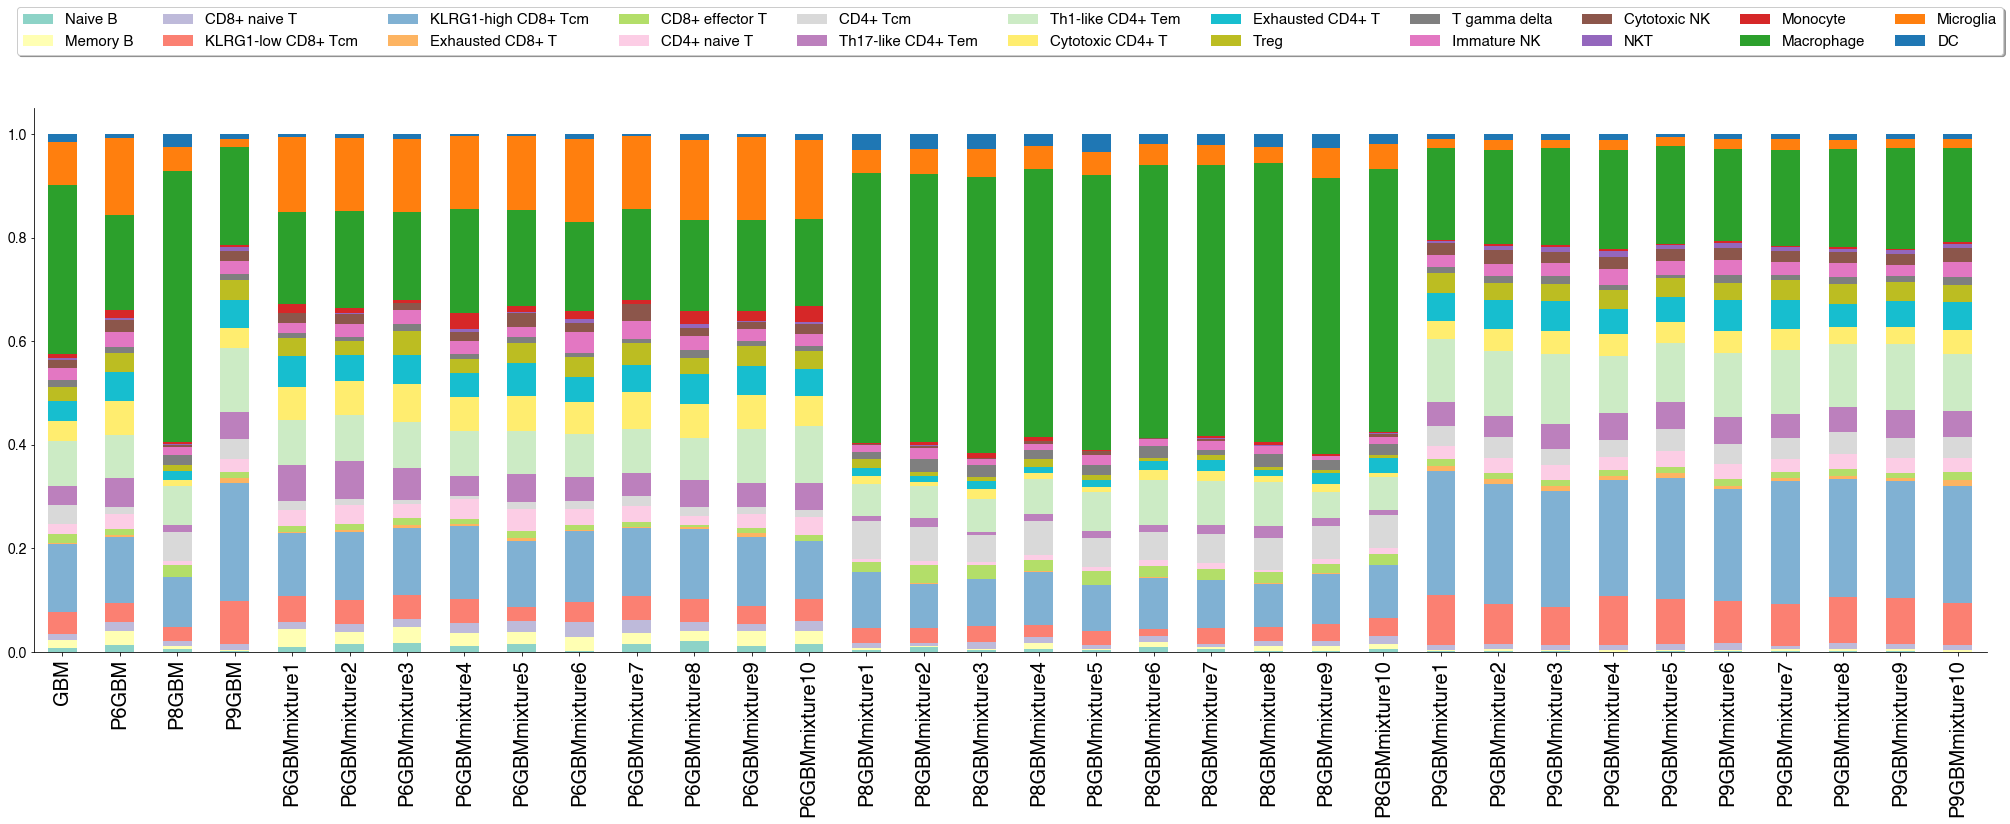

In [4]:
# here is what the answer looks like as a stacked bar plot (double click the plot to enlarge)

sns.set_palette(sns.color_palette(palette='Set3',n_colors=12) + sns.color_palette(palette='tab10_r',n_colors=10))
selected = ["GBM","P6GBM","P8GBM","P9GBM","P6GBMmixture1","P6GBMmixture2","P6GBMmixture3","P6GBMmixture4",
            "P6GBMmixture5","P6GBMmixture6","P6GBMmixture7","P6GBMmixture8","P6GBMmixture9","P6GBMmixture10",
            "P8GBMmixture1","P8GBMmixture2","P8GBMmixture3","P8GBMmixture4","P8GBMmixture5","P8GBMmixture6",
            "P8GBMmixture7","P8GBMmixture8","P8GBMmixture9","P8GBMmixture10","P9GBMmixture1","P9GBMmixture2",
            "P9GBMmixture3","P9GBMmixture4","P9GBMmixture5","P9GBMmixture6","P9GBMmixture7","P9GBMmixture8",\
            "P9GBMmixture9","P9GBMmixture10"]
# answer.loc[selected,:]
plt.figure(figsize=(35,10))
ax = plt.subplot(111)
answer.loc[:,selected].T.plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=11, fancybox=True, shadow=True, prop={'size': 15})
plt.xticks(fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [5]:
# the 22 cell types included in the anlaysis

cells = list(answer.index)
print(cells)

['Naive B', 'Memory B', 'CD8+ naive T', 'KLRG1-low CD8+ Tcm', 'KLRG1-high CD8+ Tcm', 'Exhausted CD8+ T', 'CD8+ effector T', 'CD4+ naive T', 'CD4+ Tcm', 'Th17-like CD4+ Tem', 'Th1-like CD4+ Tem', 'Cytotoxic CD4+ T', 'Exhausted CD4+ T', 'Treg', 'T gamma delta', 'Immature NK', 'Cytotoxic NK', 'NKT', 'Monocyte', 'Macrophage', 'Microglia', 'DC']


In [6]:
# here, you can use the "glob" function to find the list of cibersortx result files
# "glob("*.txt")" will find all the files in the directory that fits the pattern ".txt"

files = sorted(glob('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/*.txt'))
files

['/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v01_batch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v01_nobatch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v02_batch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v02_nobatch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v03_batch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v03_nobatch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v04_batch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v04_nobatch.txt',
 '/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v05_batch.txt',
 '/Users/da

In [7]:
# this step calculates the whole-matrix level MSE

result_compare = pd.DataFrame(index=files, columns=['MSE'])
for file in files:
    result = pd.read_table(file, index_col=0)
    result = result.T.reindex(index=cells).fillna(0)
    result_compare.loc[file,'MSE'] = mean_squared_error(answer, result)
    
result_compare.index = [i.split("/")[-1] for i in result_compare.index] # to make the file name shorter
result_compare.index = [i.strip(".txt") for i in result_compare.index] 
result_sorted = result_compare.sort_values(by='MSE')
result_sorted

,MSE
v04_batch,0.00072
v06_batch,0.00075
v02_batch,0.000823
v08_batch,0.000858
v03_batch,0.000868
v01_batch,0.000873
v07_batch,0.000995
v07_nobatch,0.001039
v05_batch,0.001142
v06_nobatch,0.001234


In [8]:
values = result_sorted.iloc[:,0].values
index = result_sorted.index
index

Index(['v04_batch', 'v06_batch', 'v02_batch', 'v08_batch', 'v03_batch',
       'v01_batch', 'v07_batch', 'v07_nobatch', 'v05_batch', 'v06_nobatch',
       'v08_nobatch', 'v05_nobatch', 'v03_nobatch', 'v02_nobatch',
       'v01_nobatch', 'v04_nobatch'],
      dtype='object')

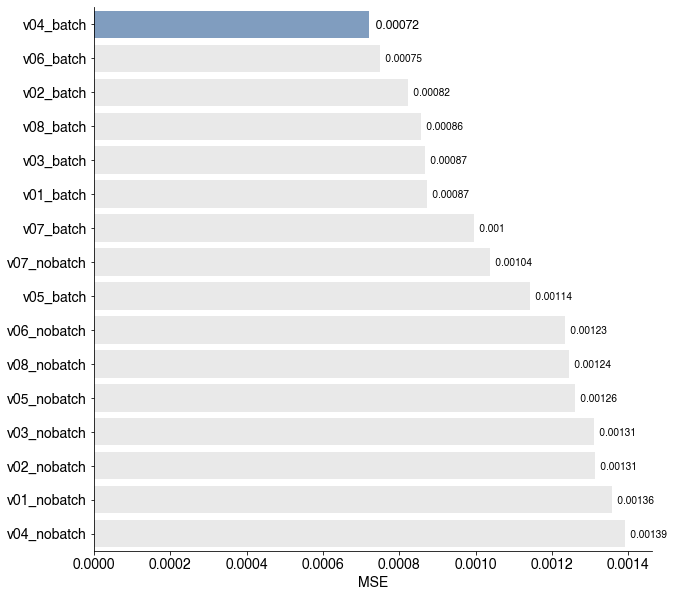

In [9]:
# this step plots the whole-matrix level MSE in the sorted order
palette = ['#E9E9E9' if (x > min(result_sorted.MSE)) else '#759DC9' for x in result_sorted.MSE]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(10,10))
ax = sns.barplot(data=result_sorted.T, orient='h', palette=palette)
ax.set_xlabel("MSE", fontsize=14)
for index, value in enumerate(values):
    if index == 0:
        plt.text(value, index, "  "+str(round(value,5)), ha = 'left', va = 'center_baseline', size=12, weight='bold')
    else:
        plt.text(value, index, "  "+str(round(value,5)), ha = 'left', va = 'center_baseline', size=10, weight='light')
sns.despine()

## In the following section, you can load one result file, and compare the results closer

In [10]:
result = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/training/v04_batch.txt', index_col=0)
result = result.iloc[:,:22]
result

,Naive B,Memory B,CD8+ naive T,KLRG1-low CD8+ Tcm,KLRG1-high CD8+ Tcm,Exhausted CD8+ T,CD8+ effector T,CD4+ naive T,CD4+ Tcm,Th17-like CD4+ Tem,...,Exhausted CD4+ T,Treg,T gamma delta,Immature NK,Cytotoxic NK,NKT,Monocyte,Macrophage,Microglia,DC
Mixture,,,,,,,,,,,,,,,,,,,,,
GBM,0.009427,0.019387,0.011136,0.053526,0.104047,0.003361,0.019249,0.014824,0.026191,0.034295,...,0.030146,0.029583,0.022280,0.023797,0.017358,0.003531,0.016313,0.340050,0.107539,0.022626
P6GBM,0.018697,0.029701,0.023943,0.029026,0.091043,0.005499,0.013479,0.026720,0.000000,0.063364,...,0.045735,0.038109,0.005641,0.027066,0.030709,0.002611,0.043205,0.103715,0.284212,0.000000
P8GBM,0.002821,0.012506,0.003002,0.054122,0.060706,0.000000,0.029756,0.003432,0.071901,0.000000,...,0.006624,0.007534,0.038877,0.012507,0.001134,0.004435,0.000000,0.591216,0.000000,0.047718
P9GBM,0.002912,0.008039,0.008378,0.103161,0.218709,0.009853,0.014210,0.020563,0.020136,0.052483,...,0.040890,0.049692,0.018630,0.028399,0.023951,0.009688,0.016455,0.199193,0.000000,0.010113
PBMC,0.086988,0.099252,0.070089,0.040344,0.007659,0.000000,0.104809,0.138494,0.110314,0.077412,...,0.000597,0.000000,0.054128,0.000000,0.084791,0.010540,0.080303,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9GBMmixture96,0.003660,0.009735,0.005037,0.111508,0.227316,0.009703,0.013388,0.017244,0.023371,0.051445,...,0.035577,0.051106,0.019680,0.032251,0.019546,0.010804,0.013317,0.195682,0.000000,0.006383
P9GBMmixture97,0.000482,0.009446,0.007871,0.097136,0.215901,0.010898,0.012493,0.024539,0.019423,0.056492,...,0.039752,0.047709,0.021458,0.028810,0.021523,0.009417,0.017789,0.195417,0.000000,0.011079
P9GBMmixture98,0.002979,0.010580,0.008575,0.100649,0.212254,0.007516,0.015986,0.023806,0.022833,0.042468,...,0.044432,0.039774,0.017779,0.032165,0.020985,0.008900,0.012439,0.214803,0.000000,0.003919


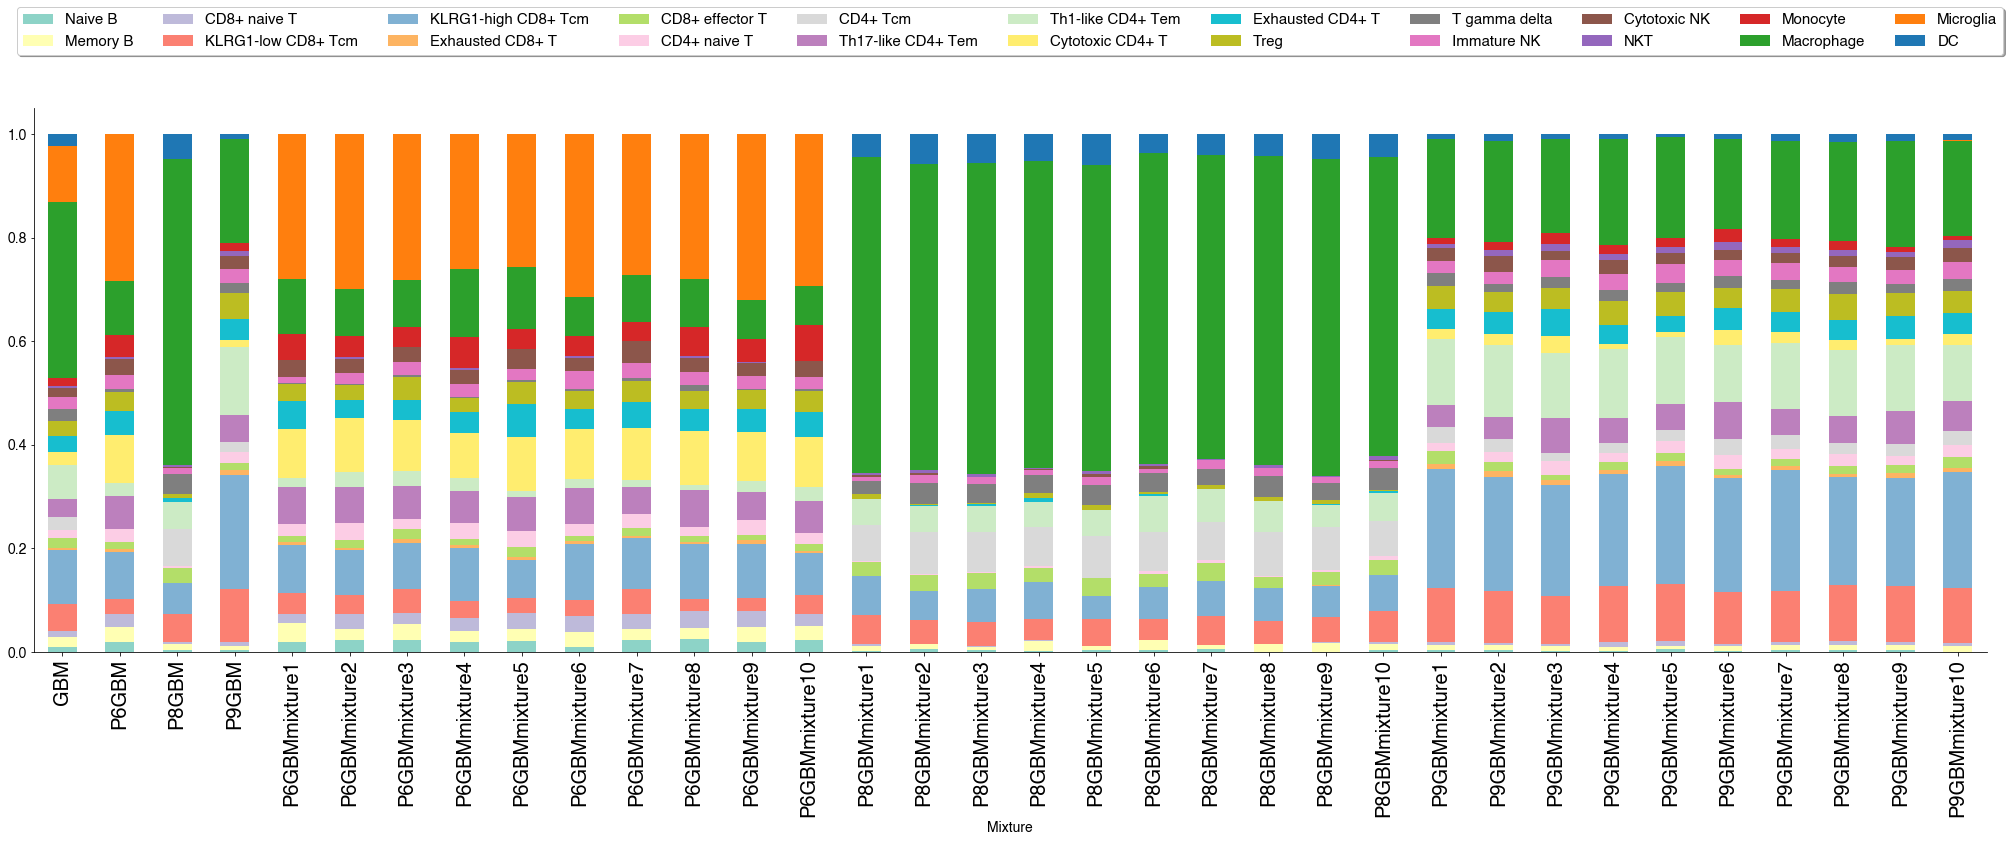

In [11]:
# to plot the Cibersortx result as stack barplot (here only the first 50 samples are shown)
# selected = ["GBM","P6GBM","P8GBM","P9GBM","P6GBMmixture1","P6GBMmixture2","P6GBMmixture3","P6GBMmixture4",
#             "P6GBMmixture5","P6GBMmixture6","P6GBMmixture7","P6GBMmixture8","P6GBMmixture9","P6GBMmixture10"]
selected = ["GBM","P6GBM","P8GBM","P9GBM","P6GBMmixture1","P6GBMmixture2","P6GBMmixture3","P6GBMmixture4",
            "P6GBMmixture5","P6GBMmixture6","P6GBMmixture7","P6GBMmixture8","P6GBMmixture9","P6GBMmixture10",
            "P8GBMmixture1","P8GBMmixture2","P8GBMmixture3","P8GBMmixture4","P8GBMmixture5","P8GBMmixture6",
            "P8GBMmixture7","P8GBMmixture8","P8GBMmixture9","P8GBMmixture10","P9GBMmixture1","P9GBMmixture2",
            "P9GBMmixture3","P9GBMmixture4","P9GBMmixture5","P9GBMmixture6","P9GBMmixture7","P9GBMmixture8",\
            "P9GBMmixture9","P9GBMmixture10"]

plt.figure(figsize=(35,10))
ax = plt.subplot(111)
result.loc[selected,:].plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=11, fancybox=True, shadow=True, prop={'size': 15})
plt.xticks(fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [12]:
answer_count

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,30,21,8,1,1060,447,358,255,5,8,...,0,0,1,1,1,1,0,1,0,1
Memory B,52,41,9,2,541,182,218,141,17,11,...,0,2,2,1,2,2,1,2,2,1
CD8+ naive T,47,25,15,7,433,62,201,170,7,8,...,3,5,5,5,3,5,3,4,3,6
KLRG1-low CD8+ Tcm,154,56,44,54,204,22,138,44,25,23,...,44,38,44,38,38,43,42,41,41,39
KLRG1-high CD8+ Tcm,487,191,148,148,387,68,202,117,61,66,...,111,113,110,116,117,117,112,117,114,120
Exhausted CD8+ T,13,6,1,6,0,0,0,0,1,2,...,4,5,5,5,5,5,5,4,6,4
CD8+ effector T,60,17,36,7,401,122,204,75,6,6,...,4,5,7,4,5,4,3,5,6,6
CD4+ naive T,73,44,12,17,1263,378,528,357,15,18,...,13,13,13,16,16,11,15,12,10,13
CD4+ Tcm,135,22,88,25,934,135,434,365,9,6,...,21,22,20,19,20,17,22,20,17,19
Th17-like CD4+ Tem,134,82,19,33,372,87,133,152,35,36,...,25,24,25,25,22,25,27,22,25,25


In [13]:
answer

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,0.008095,0.013944,0.005155,0.001543,0.124721,0.162605,0.103949,0.110581,0.010,0.016,...,0.000000,0.000000,0.002004,0.002004,0.002004,0.002004,0.000000,0.002004,0.000000,0.002004
Memory B,0.014031,0.027224,0.005799,0.003086,0.063655,0.066206,0.063298,0.061145,0.034,0.022,...,0.000000,0.004008,0.004008,0.002004,0.004008,0.004008,0.002004,0.004008,0.004008,0.002004
CD8+ naive T,0.012682,0.016600,0.009665,0.010802,0.050947,0.022554,0.058362,0.073721,0.014,0.016,...,0.006012,0.010020,0.010020,0.010020,0.006012,0.010020,0.006012,0.008016,0.006012,0.012024
KLRG1-low CD8+ Tcm,0.041554,0.037185,0.028351,0.083333,0.024003,0.008003,0.040070,0.019081,0.050,0.046,...,0.088176,0.076152,0.088176,0.076152,0.076152,0.086172,0.084168,0.082164,0.082164,0.078156
KLRG1-high CD8+ Tcm,0.131409,0.126826,0.095361,0.228395,0.045535,0.024736,0.058653,0.050737,0.122,0.132,...,0.222445,0.226453,0.220441,0.232465,0.234469,0.234469,0.224449,0.234469,0.228457,0.240481
Exhausted CD8+ T,0.003508,0.003984,0.000644,0.009259,0.000000,0.000000,0.000000,0.000000,0.002,0.004,...,0.008016,0.010020,0.010020,0.010020,0.010020,0.010020,0.010020,0.008016,0.012024,0.008016
CD8+ effector T,0.016190,0.011288,0.023196,0.010802,0.047182,0.044380,0.059233,0.032524,0.012,0.012,...,0.008016,0.010020,0.014028,0.008016,0.010020,0.008016,0.006012,0.010020,0.012024,0.012024
CD4+ naive T,0.019698,0.029216,0.007732,0.026235,0.148606,0.137505,0.153310,0.154814,0.030,0.036,...,0.026052,0.026052,0.026052,0.032064,0.032064,0.022044,0.030060,0.024048,0.020040,0.026052
CD4+ Tcm,0.036427,0.014608,0.056701,0.038580,0.109895,0.049109,0.126016,0.158283,0.018,0.012,...,0.042084,0.044088,0.040080,0.038076,0.040080,0.034068,0.044088,0.040080,0.034068,0.038076
Th17-like CD4+ Tem,0.036158,0.054449,0.012242,0.050926,0.043770,0.031648,0.038618,0.065915,0.070,0.072,...,0.050100,0.048096,0.050100,0.050100,0.044088,0.050100,0.054108,0.044088,0.050100,0.050100


In [14]:
# here, loop through all 22 cell types, loop through all cibersortx results, calculate the results


# create empty matrix to record the values
pcc_matrix = np.zeros((len(cells), len(files)))
mse_matrix = np.zeros((len(cells), len(files)))

for j in range(len(files)):
    res = pd.read_table(files[j], sep="\t", index_col=0).iloc[:,:22]
    for i in range(len(cells)):
        pcc,pv = pearsonr(res.loc[:,cells[i]], answer.loc[cells[i],:])
        e = mean_squared_error(res.loc[:,cells[i]], answer.loc[cells[i],:])
        pcc_matrix[i,j] = pcc; mse_matrix[i,j] = e
    
pcc_matrix = pd.DataFrame(pcc_matrix, index=cells, columns=[i.split("/")[-1] for i in files])
mse_matrix = pd.DataFrame(mse_matrix, index=cells, columns=[i.split("/")[-1] for i in files])
pcc_matrix

,v01_batch.txt,v01_nobatch.txt,v02_batch.txt,v02_nobatch.txt,v03_batch.txt,v03_nobatch.txt,v04_batch.txt,v04_nobatch.txt,v05_batch.txt,v05_nobatch.txt,v06_batch.txt,v06_nobatch.txt,v07_batch.txt,v07_nobatch.txt,v08_batch.txt,v08_nobatch.txt
Naive B,0.935868,0.907655,0.945429,0.941403,0.925078,0.905424,0.917417,0.926448,0.940982,0.914280,0.944174,0.912013,0.944392,0.917103,0.929838,0.908221
Memory B,0.960057,0.856897,0.975437,0.944442,0.929720,0.773735,0.949431,0.894812,0.956939,0.921237,0.904512,0.909302,0.951596,0.923827,0.918026,0.916515
CD8+ naive T,0.775673,0.603277,0.801816,0.643344,0.744169,0.653495,0.832032,0.651142,0.775478,0.645057,0.735067,0.718776,0.788178,0.664575,0.800608,0.730253
KLRG1-low CD8+ Tcm,0.864241,0.774874,0.922909,0.924345,0.756036,0.650687,0.894500,0.887016,0.854539,0.864036,0.970611,0.906015,0.882745,0.835462,0.973012,0.885793
KLRG1-high CD8+ Tcm,0.991706,0.952448,0.977198,0.960206,0.986465,0.944083,0.988658,0.960246,0.990676,0.953494,0.988519,0.984939,0.988698,0.947051,0.980367,0.980215
Exhausted CD8+ T,0.873724,0.846021,0.873894,0.863999,0.879183,0.852888,0.900960,0.873842,0.824961,0.795484,0.811860,0.813460,0.900320,0.786701,0.923025,0.811735
CD8+ effector T,0.707774,0.542068,0.831741,0.745453,0.630757,0.668685,0.841417,0.810441,0.644531,0.811007,0.843316,0.885818,0.603275,0.794312,0.862705,0.881624
CD4+ naive T,0.942320,0.823980,0.970735,0.885466,0.888604,0.802290,0.965809,0.876297,0.944954,0.878114,0.960927,0.879026,0.930150,0.828147,0.953631,0.873190
CD4+ Tcm,0.919677,0.757825,0.936771,0.762797,0.902607,0.660805,0.912859,0.771479,0.930508,0.756147,0.879947,0.734140,0.910089,0.741107,0.866743,0.736782
Th17-like CD4+ Tem,0.896992,0.857233,0.943378,0.878220,0.929553,0.739533,0.945766,0.919740,0.888567,0.937544,0.948422,0.951445,0.941691,0.937138,0.954698,0.956341


In [15]:
mse_matrix

,v01_batch.txt,v01_nobatch.txt,v02_batch.txt,v02_nobatch.txt,v03_batch.txt,v03_nobatch.txt,v04_batch.txt,v04_nobatch.txt,v05_batch.txt,v05_nobatch.txt,v06_batch.txt,v06_nobatch.txt,v07_batch.txt,v07_nobatch.txt,v08_batch.txt,v08_nobatch.txt
Naive B,0.000029,0.000049,0.000031,0.000026,0.000036,0.000054,0.000038,0.000032,0.000027,0.000038,0.000026,0.000038,0.000026,0.000042,0.000032,0.000040
Memory B,0.000041,0.000071,0.000020,0.000038,0.000036,0.000117,0.000044,0.000074,0.000018,0.000030,0.000035,0.000032,0.000017,0.000030,0.000025,0.000029
CD8+ naive T,0.000103,0.001562,0.000091,0.000990,0.000111,0.000973,0.000064,0.001016,0.000116,0.000266,0.000065,0.000172,0.000121,0.000268,0.000087,0.000164
KLRG1-low CD8+ Tcm,0.000652,0.000476,0.000234,0.000207,0.000576,0.000949,0.000333,0.000363,0.000445,0.000420,0.000188,0.000176,0.001060,0.000596,0.000397,0.000226
KLRG1-high CD8+ Tcm,0.000575,0.008466,0.000700,0.008513,0.001375,0.008941,0.000832,0.008895,0.001114,0.002024,0.000990,0.001644,0.001048,0.002084,0.001849,0.001710
Exhausted CD8+ T,0.000008,0.000840,0.000015,0.000621,0.000006,0.000567,0.000003,0.000484,0.000011,0.000086,0.000009,0.000054,0.000004,0.000083,0.000003,0.000050
CD8+ effector T,0.000155,0.000376,0.000095,0.000232,0.000122,0.000132,0.000066,0.000160,0.000217,0.000126,0.000115,0.000119,0.000250,0.000116,0.000220,0.000126
CD4+ naive T,0.000123,0.000293,0.000064,0.000161,0.000074,0.000441,0.000045,0.000194,0.000096,0.000223,0.000072,0.000215,0.000182,0.000344,0.000066,0.000221
CD4+ Tcm,0.000188,0.000741,0.000298,0.001168,0.000353,0.000364,0.000304,0.000973,0.000159,0.000911,0.001207,0.002283,0.000224,0.000818,0.002015,0.002501
Th17-like CD4+ Tem,0.000253,0.001281,0.000142,0.000732,0.000345,0.001654,0.000152,0.000750,0.000424,0.001399,0.000441,0.001498,0.000841,0.002109,0.000267,0.001540


<AxesSubplot:>

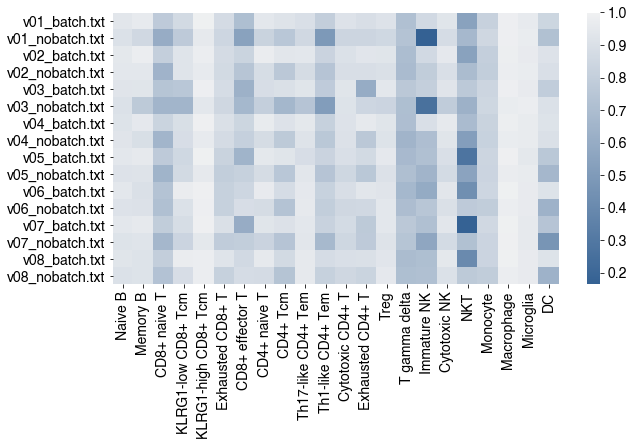

In [16]:
# visualize the PCC matrix as heatmap
# white and blue means weakly correlated with ground truth (not good)
# red means strongly positively correlated with ground truth (good results)

plt.figure(figsize=(10,5))
light_pal = sns.light_palette('#346193', input='rgb', as_cmap=True, reverse=True)
sns.heatmap(pcc_matrix.T, cmap=light_pal, vmax=1)

<AxesSubplot:>

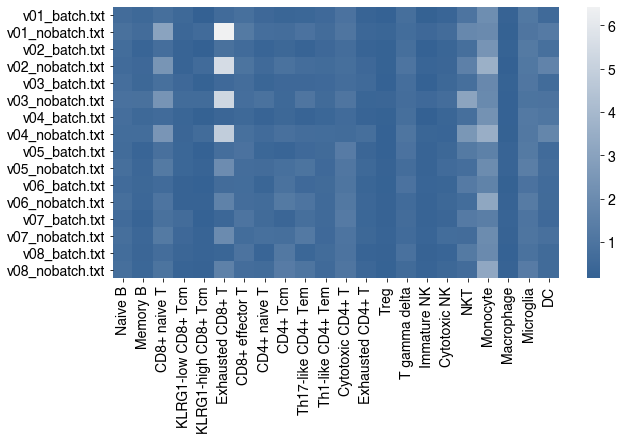

In [17]:
# visualize the MSE matrix as heatmap
# white and blue means lower error (good result)
# red means relatively higher error (not good)
import numpy as np
for i in mse_matrix.index:
    mse_matrix.loc[i,:] = np.sqrt(mse_matrix.loc[i,:])/np.mean(answer.loc[i,:])
plt.figure(figsize=(10,5))
sns.heatmap(mse_matrix.T, cmap=light_pal)

<AxesSubplot:>

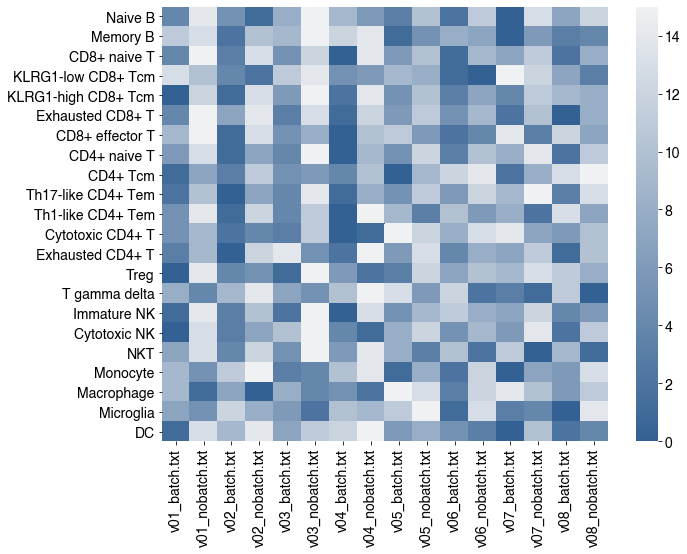

In [18]:
ranked = mse_matrix.copy()
for i in ranked.index:
    l = mse_matrix.loc[i,:]
    ranked.loc[i,:] = [sorted(l).index(x) for x in l]
plt.figure(figsize=(10,8))
sns.heatmap(ranked, cmap=light_pal)

In [19]:
mean_squared_error(answer, result.T)

0.0007197450400028834